# Synopsis

In this notebook, we will explore some situations where our intuition is not really providing us with good insights into the outcomes of certain processes.  Coupled with innumeracy, this leads to poor decisions because risks and costs are either understated or overstated.

# Read libraries and functions

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

my_fontsize = 15

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats

from collections import Counter
from pathlib import Path

from My_libraries.my_stats import half_frame


# Why statistics?

Statistics help us think critically and rationally about data and numbers. It is impossible to be an informed citizen of a democracy while being innumerate.

Innumerate people think they know whether something is small or large in the absence of context.

Is 1/5 of an inch large?

One cannot answer without having a context.  Imagine that sea levels rise by 1/5" a year (about the current estimate). In 50 years they would have risen 10", nearly a foot.  How many people would be affected bu such a rise in sea levels? A recent [study](https://www.nature.com/articles/s41467-019-12808-z) estimates that 230 million people currently live within 1 meter of current high tide levels.

Innumerate people make political strategy recommendations based on changes in polling results of candidates of a few tenths of a percentage point.

Innumerate people are easy targets for scams because they do not realize when the tables are tilted toward the house.

Innumerate people take unnecessary risks and make incorrect cost-benefit assessments.

Innumerate people do not realize that inappropriate data will focus attention on the wrong thing and make problems worse.

Innumerate people do not realize that skewed distributions make statistics such as the average atypical.


# The challenge of uncertainty

Economists have, for a long time, studied *homo economicus*. This strange species is omniscient and able easily and quickly to perform any calculation.  Unlike *economicus*, *sapiens* typically has access to incomplete or even erronious information and rather more limited computing abilities.

In fact, in more practical situations, we cannot obtain all necessary information to know with certainty what is the current state of the world.  Consider elections.  You can imagine how a candidate would love to have access to daily updates on the number of votes that they and their rivals would receive if the election was to occur on that day. With that information, they would be able to determine whether their electoral strategy was working or not, and test which changes would improve their ability to receive the most votes.

Getting such an update would be prohibitively expensive.  Daily contacting and receiving vote intentions from every potential voter in a given area would require huge numbers of people constantly contacting potential votes.  Even for a small state such as New Hampshire, that would mean contacting on the order to 400 thousand individuals daily.  

Moreover, even if you could contact all of those people, there was not assurance that they would answer your question or tell you their true voting intentions. 

That is why no one runs election polls in that manner. Instead polling groups survey much smaller groups rather infrequently.  Consider some poll results for the 2020 Democratic Presidential Primary in New Hampshire.

<img src = "Images/poll_results.png" width = '600'>

Notice that most polls survey about 700 people and that even that small number of people are reached over a period of several days.   Notice also that even though the polls where all taken in the same period, the voting intentions for Sanders varied between 24% and 31% whereas for Buttigieg, they varied between 21% and 25%.

Some times, such poll results are presented with even more digits (25.3%) suggesting a degree of certainty that seems unwarranted. Most time, at the end of the press release there is a statement about the results having an uncertainty of $\pm 3%$.

**What does this means?**

We will use the computer the simulate the polling process and see whether we can determine where the uncertainty comes from.


In [3]:
# Define variables

n_voters = 400000
real_intentions = { 'Sanders': 0.26, 'Buttigieg': 0.24, 'Klobuchar': 0.2,
                    'Warren': 0.09, 'Biden': 0.08 }

poll_sizes = [500, 500, 700, 1000]


In [24]:
# Simulate a poll

def poll(n_voters, real_intentions, poll_size):
    """
    
    inputs:
        n_voters -- int
        real_intentions -- dict with candidate's name as key and 
                           probabilty of getting a vote as value
        poll_size -- int
        
    returns:
        counter -- collections.Counter object
    """
    candidates = sorted( list(real_intentions.keys()) )
    preferences = []
    for i in range(poll_size):
        x = random.random()
        k = -1
        p = 0

        while x > p:
            k += 1
            if k == len(candidates) - 1:
                preferences.append('Other')
                break
            p += real_intentions[candidates[k]]
        
        preferences.append(candidates[k])
        
    return Counter(preferences)
    


In [50]:
# Run many polls
#
n_polls = 100
poll_size = 500
sanders_preferences = []
for i in range(n_polls):
    counter = poll(n_voters, real_intentions, poll_size)
    sanders_preferences.append(counter['Sanders'] / poll_size * 100)

stats.describe(sanders_preferences)

DescribeResult(nobs=100, minmax=(20.599999999999998, 32.0), mean=25.941999999999993, variance=3.793369696969696, skewness=0.12227604264781185, kurtosis=0.40395587423974266)

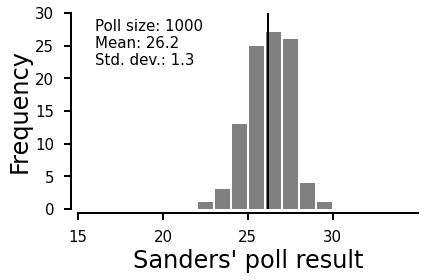

In [49]:
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot( 111 )
half_frame(ax, "Sanders' poll result", 'Frequency', font_size = my_fontsize)

ax.hist( sanders_preferences, bins = np.arange(0, 40, 1), color = 'gray',
         align = 'mid', rwidth = 0.9 )

ax.set_ylim(0, 30)
ax.set_xlim(15, 35)
ax.set_xticks(list(np.arange(15, 35, 5)))

ax.vlines(np.mean(sanders_preferences), 0, 30, color = 'k', lw = 2)

ax.text(16, 22, (f"Poll size: {poll_size}\n"
                 f"Mean: {np.mean(sanders_preferences):>.1f}\n"
                 f"Std. dev.: {np.std(sanders_preferences):>.1f}"), 
        fontsize = my_fontsize)

plt.tight_layout()

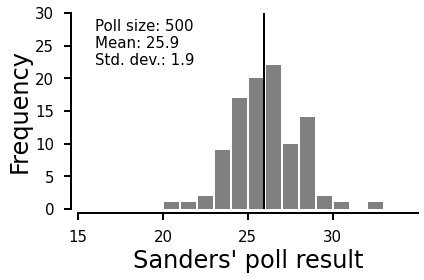

In [51]:
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot( 111 )
half_frame(ax, "Sanders' poll result", 'Frequency', font_size = my_fontsize)

ax.hist( sanders_preferences, bins = np.arange(0, 40, 1), color = 'gray',
         align = 'mid', rwidth = 0.9 )

ax.set_ylim(0, 30)
ax.set_xlim(15, 35)
ax.set_xticks(list(np.arange(15, 35, 5)))

ax.vlines(np.mean(sanders_preferences), 0, 30, color = 'k', lw = 2)

ax.text(16, 22, (f"Poll size: {poll_size}\n"
                 f"Mean: {np.mean(sanders_preferences):>.1f}\n"
                 f"Std. dev.: {np.std(sanders_preferences):>.1f}"), 
        fontsize = my_fontsize)

plt.tight_layout()

The numbers I used for the voting intentions are pretty much the results from the actuall election

<img src = "Images/election_results.png" width = '500'>


# Playing games of chance

I am inviting you to a game of dice. And just to make it interesting, we will put a little money behind it. Every time I get at least a `1` when I roll two dice, you pay me triple my bet. If I roll no `1`s I loose my bet.

Wanna play?



.



.



Let's set our game up:

In [51]:
def roll_die():
    return random.randint(1, 6)

def play_one_round(my_stake, your_stake, total_rounds, fraction):
    count = 0
    while my_stake > 1/fraction and your_stake > 1/fraction:
        count += 1
        
        # Stakes are expressed in cents and a cent is the smallest 
        # amount of money that can be bet
        bet = int(my_stake * fraction)
        
        d1 = roll_die()
        d2 = roll_die()
        if d1 == 1 or d2 == 1:
            your_stake -= 3 * bet
            
            # Should you be able to risk more than your
            # minimum stake at risk?
            if your_stake < 3 * my_stake:
                return count, my_stake
            
            my_stake += 3 * bet            
        else:
            my_stake -= bet
            your_stake += bet
            
        if count > total_rounds:
            return count, my_stake
        
    return count, my_stake


Let's say I am have $\$10.00$ (1000 cents) in my wallet, and you feel generous and agree to risk a minimum of $20.00.

For simplicity, I will always bet a third of my cash rounded down to the closest cent.

Let's also say that we will stop the game if my bet would be smaller than 1 cent, or if we have gone for 100 rounds.

**You can see that there are lots of parameters in this game**.

**In your view, do any of them matter?**

In [66]:
my_stake = 1000
your_stake = 4000
total_rounds = 100
fraction = 0.2

final_pots = []
final_counts = []

for i in range(10000):
    a, b = play_one_round(my_stake, your_stake, total_rounds, fraction)
    final_pots.append(b)
    final_counts.append(a)
    
print(f"The typical game last {np.mean(final_counts):.0f} rounds and I win"
      f" an average of {np.mean(final_pots)-my_stake:.2f} cents.")


# plt.plot(final_counts, final_pots, 'ro', alpha = 0.1)
# plt.show()

The typical game last 37 rounds and I win an average of 36.98 cents.


# Most things eventually fail

Some people like to own new cars because everything is new and thus less likely to fail.  With an old, used car, you do not know whether the transmission is about to go kaput, or whether the spark plugs are dying, or if the battery is its last legs.

The risks are naturally heightened if, instead of dealing with a drive to the grocery store, we are dealing with a flight across the Atlantic, or considering a rocket trip to the Moon.

If the rocket's spark plugs fail, we would be in real trouble.

For this reason, it is really important to characterize things such as failure rates of components so that we can provide enough redundancy in our system so that any single component failure is not critical.

It turns out that in many many situations, the failure rate of 'simple' components behaves as a **geometric distribution**.


## Geometric distribution 

The geometric distribution is the result of considering a statistical process in which you count the number of events until a specific outcome occurs.  Imagine that you are rolling a die.  **How many rolls can you expect to have to make until you get a `1`?**

Assuming we are dealing with a fair die, than the probability of rolling a `1` is 1/6.  Then the probability of having to wait `k` rolls until getting a `1` is:

> $\left( \frac{5}{6} \right)^{k-1}~.~\frac{1}{6}$

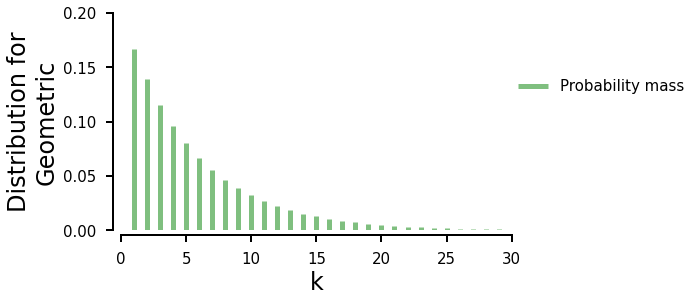

In [78]:
p = 1/6
x = np.arange(stats.geom.ppf(0, p), stats.geom.ppf(0.999, p))
rv1 = stats.geom(p)


fig = plt.figure( figsize = (7, 4) )
ax = fig.add_subplot(1,1,1)
half_frame(ax, "k", "Distribution for\nGeometric", font_size = my_font_size)

# Calculate and plot histogram
ax.vlines(x, 0, rv1.pmf(x), color = "g", linewidth = 5, alpha = 0.5, 
          label = "Probability mass")
# ax.vlines(x, 0, rv1.sf(x), color = "gray", linewidth = 5, alpha = 0.5, 
#           label = "Survival function")


# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, 
          fontsize = my_font_size)
ax.set_ylim(0, 0.2)
ax.set_xlim(0, 30)

plt.show()

So, as I explained, you are going to be traveling on a rocket ship to the Moon. The trip is going to take 3 days.

You are concerned because a particular component has a 0.05 probability of failure during any hour of operation. How much redundancy would you require?

First, let us see what is the probability that the component avoids failure in the course of the three days.


In [84]:
prob_failure = 0.05
n_attempts = 1000

failed = 0
for i in range(n_attempts):
    for k in range(3 * 24):
        if random.random() < 0.05:
            failed += 1
            break

print(f"In {failed} out of {n_attempts} attempts, the component failed "
      f"too early.\nThat is {100*failed/n_worlds:.1f}% of the time.")

In 976 out of 1000 attempts, the component failed too early.
That is 97.6% of the time.


Definitely not good.  I am not getting in that rocket.

What if we have `n_components` in parallel for redundancy?

In [96]:
prob_failure = 0.05
n_worlds = 1000
n_components = 200

failed = 0
for i in range(n_attempts):
    failed_components = 0
    for component in range(n_components):
        for k in range(3 * 24):
            if random.random() < 0.05:
                failed_components += 1
                break
        if failed_components == n_components:
            failed += 1
            break

print(f"In {failed} out of {n_attempts} attempts, the component failed "
      f"too early.\nThat is {100*failed/n_worlds:.1f}% of the time.")

In 3 out of 1000 attempts, the component failed too early.
That is 0.3% of the time.


Not great is it?  Because we have crappy components, we need huge amounts of them to avoid catastrophe.  One to to consider is that redundancy is adding to the weight of the rocket ship, which will add to the cost.

Should we pay more for better components or pay more for operating a heavier rocket?

# When aggregate data hide the true pattern

There is a famous result in statistics that goes by the name of [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox). Danielle Navarro provides a particularly good example in her [Learning Statistics with R](https://learningstatisticswithr.com/book/why-do-we-learn-statistics.html) book which I quote:

<br>
<center>
<p style = "width: 80%">
"In 1973, the University of California, Berkeley had some worries about the admissions of students into their postgraduate courses. Specifically, the thing that caused the problem was that the gender breakdown of their admissions, which looked like this…"

<table>
<tr> 
    <td> </td> <td><b>Number of applicants</b></td> <td><b>Admitted</b></td> 
</tr>
<tr> 
    <td> <b>Males</b> </td> <td>8,442</td> <td>46%</td> 
</tr>
<tr> 
    <td> <b>Females</b> </td> <td>4,321</td> <td>35%</td> 
</tr>        
</table>	 	
</center>

These numbers seem pretty damning of the admission process at Berkeley.  However, the story is a bit more subtle. If one looks at the number broken down by department, the picture is radically changed.

<center>
<table>
<tr> 
    <td><b>Department</b></td> <td><b>Male Applicants</b></td> <td><b>Admitted</b></td> 
    <td><b>Female Applicants</b></td> <td><b>Admitted</b></td>
</tr>
<tr> 
    <td> <b>A</b> </td> <td>825</td> <td>62%</td> <td>108</td> <td>82%</td>
</tr>
<tr> 
    <td> <b>B</b> </td> <td>560</td> <td>63%</td> <td>25</td> <td>68%</td>
</tr>    
<tr> 
    <td> <b>C</b> </td> <td>325</td> <td>37%</td> <td>593</td> <td>34%</td>
</tr>    
<tr> 
    <td> <b>D</b> </td> <td>417</td> <td>33%</td> <td>375</td> <td>35%</td>
</tr>    
<tr> 
    <td> <b>E</b> </td> <td>191</td> <td>28%</td> <td>393</td> <td>24%</td>
</tr>    
<tr> 
    <td> <b>F</b> </td> <td>272</td> <td>6%</td> <td>341</td> <td>7%</td>
</tr>  
</table>	 	    
 
<br>
<p style = "width: 80%">
Remarkably, most departments had a higher rate of admissions for females than for males! Yet the overall rate of admission across the university for females was lower than for males. How can this be? How can both of these statements be true at the same time?

<br>
<p style = "width: 80%">
Here's what's going on. Firstly, notice that the departments are not equal to one another in terms of their admission percentages: some departments [...] tended to admit a high percentage of the qualified applicants, whereas others [...] tended to reject most of the candidates, even if they were high quality. So, among the six departments shown above, notice that department A is the most generous, followed by B, C, D, E and F in that order. Next, notice that males and females tended to apply to different departments. If we rank the departments in terms of the total number of male applicants, we get A > B > D > C > F > E. On the whole, males tended to apply to the departments that had high admission rates.
</center>






Let's check the math adds up

In [107]:
male_applicants = np.array([825, 560, 325, 417, 191, 271])
male_admission_fractions = np.array([0.62, 0.63, 0.37, 0.33, 0.29, 0.06])
total_male_applicants = sum(male_applicants)
total_male_admits = sum(male_admission_fractions * male_applicants)

print(f"For these six departments, there were {total_male_applicants} "
      f"male applicants and {int(total_male_admits)} admits.\n")

overall_male_admission_rate = total_male_admits / total_male_applicants

print(f"This yields an overall male admission rate of "
      f"{100*overall_male_admission_rate:.0f}%")

For these six departments, there were 2589 male applicants and 1193 admits.

This yields an overall male admission rate of 46%


In [108]:
female_applicants = np.array([108, 25, 593, 375, 393, 341])
female_admission_fractions = np.array([0.82, 0.68, 0.34, 0.35, 0.24, 0.07])
total_female_applicants = sum(female_applicants)
total_female_admits = sum(female_admission_fractions * female_applicants)

print(f"For these six departments, there were {total_female_applicants} "
      f"female applicants and {int(total_female_admits)} admits.\n")

overall_female_admission_rate = total_female_admits / total_female_applicants

print(f"This yields an overall female admission rate of "
      f"{100*overall_female_admission_rate:.0f}%")

For these six departments, there were 1835 female applicants and 556 admits.

This yields an overall female admission rate of 30%


# Elon Must enters a bar...

and suddenly the **average** patron is fucking sub-human piece of sociopath shit.

No, wait, I meant *a billionaire*.

When we talk about the average Joe, we imagine someone that is typical and representative. Consider the students in this class. What is their average height? Probably something like 5'8"...  Most of you are likely somewhere between 5'4" and 6'0". About half will be taller than the average and half will be shorter.

Our intuition about statistics is driven by the expected outcomes for the so-called normal or bell-curve distribution. Measurements aggregate around the average, so the average is quite representative of the population.

The probability density function of the bell-curve distribution is:

> $f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}} e^{- (x - \mu)^2 / 2\sigma^2}$ 


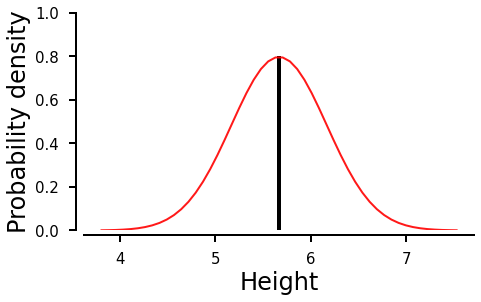

In [117]:
mu = 5.67
sigma = 0.5 
x = np.linspace(stats.norm.ppf(0.0001, mu, sigma), stats.norm.ppf(0.9999, mu, sigma))
f_x = stats.norm(mu, sigma)

fig = plt.figure( figsize = (7, 4) )
ax = fig.add_subplot(1,1,1)
half_frame(ax, "Height", "Probability density", font_size = my_font_size)

ax.plot(x, f_x.pdf(x), color = "r", linewidth = 2, alpha = 0.9)
ax.vlines(5.67, 0, 0.8, color = 'k', lw = 4, zorder = -10)

ax.set_ylim(0, 1)

plt.show()

In contrast, the distribution of wealth $-$ and of sociopathy $-$ is very right skewed. A good description is a power law distribution. Its probability density function is:

> $f(x; \alpha) = \frac{1}{\alpha - 1} ~ x^{-\alpha} ~~~~~$  

where $x \ge 1$  and $\alpha > 1$.

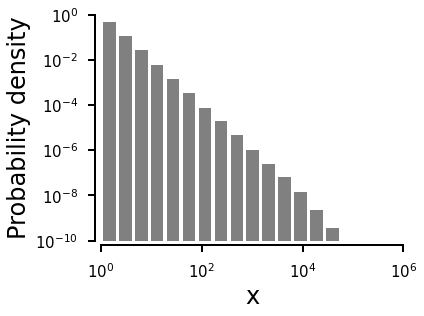

In [185]:
# This creates data with alpha = 2.
#
data = 1. / stats.uniform.rvs(0, 1, size = 100000)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_font_size)

ax.hist( data, bins = np.geomspace(1, 1E6, num = 20), color = 'gray', 
         align = 'mid', rwidth = 0.8, density = True )

ax.loglog()

ax.set_ylim(1E-10, 1)
ax.set_xlim(1, 1E6)

plt.tight_layout()

This actually does not show how variable the statistical descriptor of small samples are...

The smallest mean is 3.1, the largest is 102.2

The smallest st. dev. is 3.0, the largest is 934.4



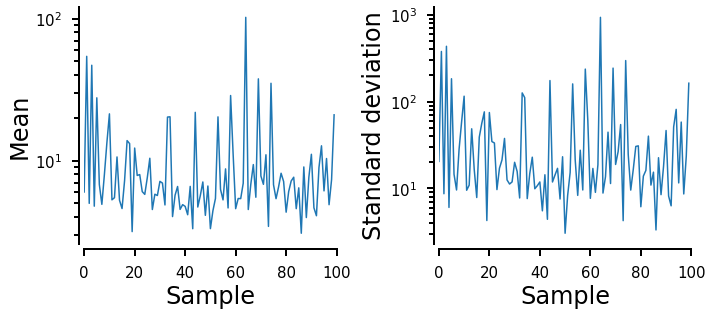

In [209]:
means = []
st_devs = []
for i in range(100):
    data = 1. / stats.uniform.rvs(0, 1, size = 100)
    means.append(np.mean(data))
    st_devs.append(np.std(data))

fig = plt.figure( figsize = (10, 4.5) )
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

half_frame(ax1, "Sample", "Mean", font_size = my_font_size)
ax1.semilogy(means)
ax1.set_xlim(0, 100)

half_frame(ax2, "Sample", "Standard deviation", font_size = my_font_size)
ax2.semilogy(st_devs)
ax2.set_xlim(0, 100)

plt.tight_layout()

print(f"The smallest mean is {min(means):.1f}, the largest is {max(means):.1f}\n")
print(f"The smallest st. dev. is {min(st_devs):.1f}, the largest is {max(st_devs):.1f}\n")

Yes, **the mean can change by a factor of 30 and the standard deviation by a factor of 300!**

This is the similar analysis with a normal process.

The smallest mean is 488.2, the largest is 511.6

The smallest mean is 38.5, the largest is 57.5



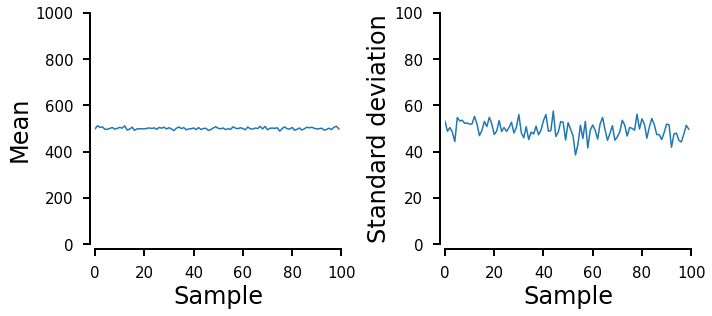

In [208]:
means = []
st_devs = []
for i in range(100):
    data = stats.norm.rvs(500, 50, size = 100)
    means.append(np.mean(data))
    st_devs.append(np.std(data))

fig = plt.figure( figsize = (10, 4.5) )
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

half_frame(ax1, "Sample", "Mean", font_size = my_font_size)
ax1.plot(means)
ax1.set_ylim(0, 1000)
ax1.set_xlim(0, 100)

half_frame(ax2, "Sample", "Standard deviation", font_size = my_font_size)
ax2.plot(st_devs)
ax2.set_ylim(0, 100)
ax2.set_xlim(0, 100)

plt.tight_layout()

print(f"The smallest mean is {min(means):.1f}, the largest is {max(means):.1f}\n")
print(f"The smallest st. dev. is {min(st_devs):.1f}, the largest is {max(st_devs):.1f}\n")

Notice that the y-axis has a linear scale now. Variability is just a few percent.  That is why normal processes give meaning to our intuition of what typical means. 